In [2]:
# Mount Google Drive first
from google.colab import drive
drive.mount('/content/drive')

# Then load your data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = '/content/drive/My Drive/Project Colab/data breast cancer.csv'
df = pd.read_csv(file_path)
df.head()

Mounted at /content/drive


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Display basic information about each column
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# Check the distribution of diagnosis (target variable)
diagnosis_counts = df['diagnosis'].value_counts()
print("Diagnosis Distribution:")
print(diagnosis_counts)
print("\nPercentages:")
print(df['diagnosis'].value_counts(normalize=True) * 100)

Diagnosis Distribution:
diagnosis
B    357
M    212
Name: count, dtype: int64

Percentages:
diagnosis
B    62.741652
M    37.258348
Name: proportion, dtype: float64


/tmp/ipython-input-839680501.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='diagnosis', palette=['lightblue', 'salmon'])


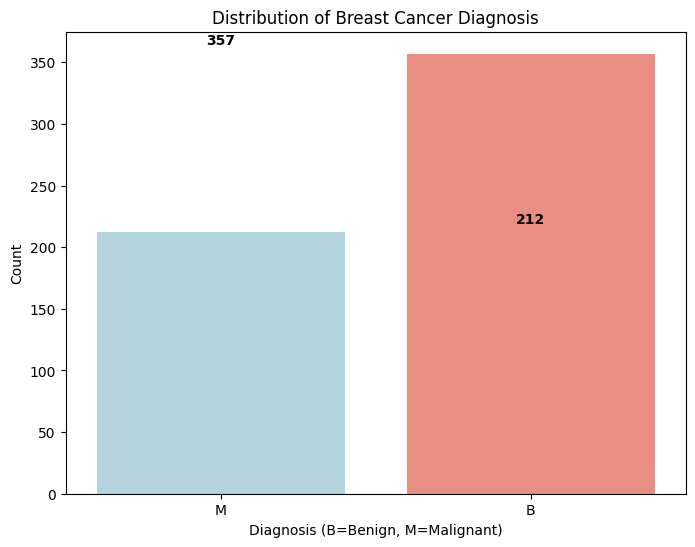

In [5]:
# Visualize diagnosis distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='diagnosis', palette=['lightblue', 'salmon'])
plt.title('Distribution of Breast Cancer Diagnosis')
plt.xlabel('Diagnosis (B=Benign, M=Malignant)')
plt.ylabel('Count')

# Add count labels on bars
for i, v in enumerate(diagnosis_counts.values):
    plt.text(i, v + 5, str(v), ha='center', va='bottom', fontweight='bold')

plt.show()

Mean features we're analyzing:
['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean']


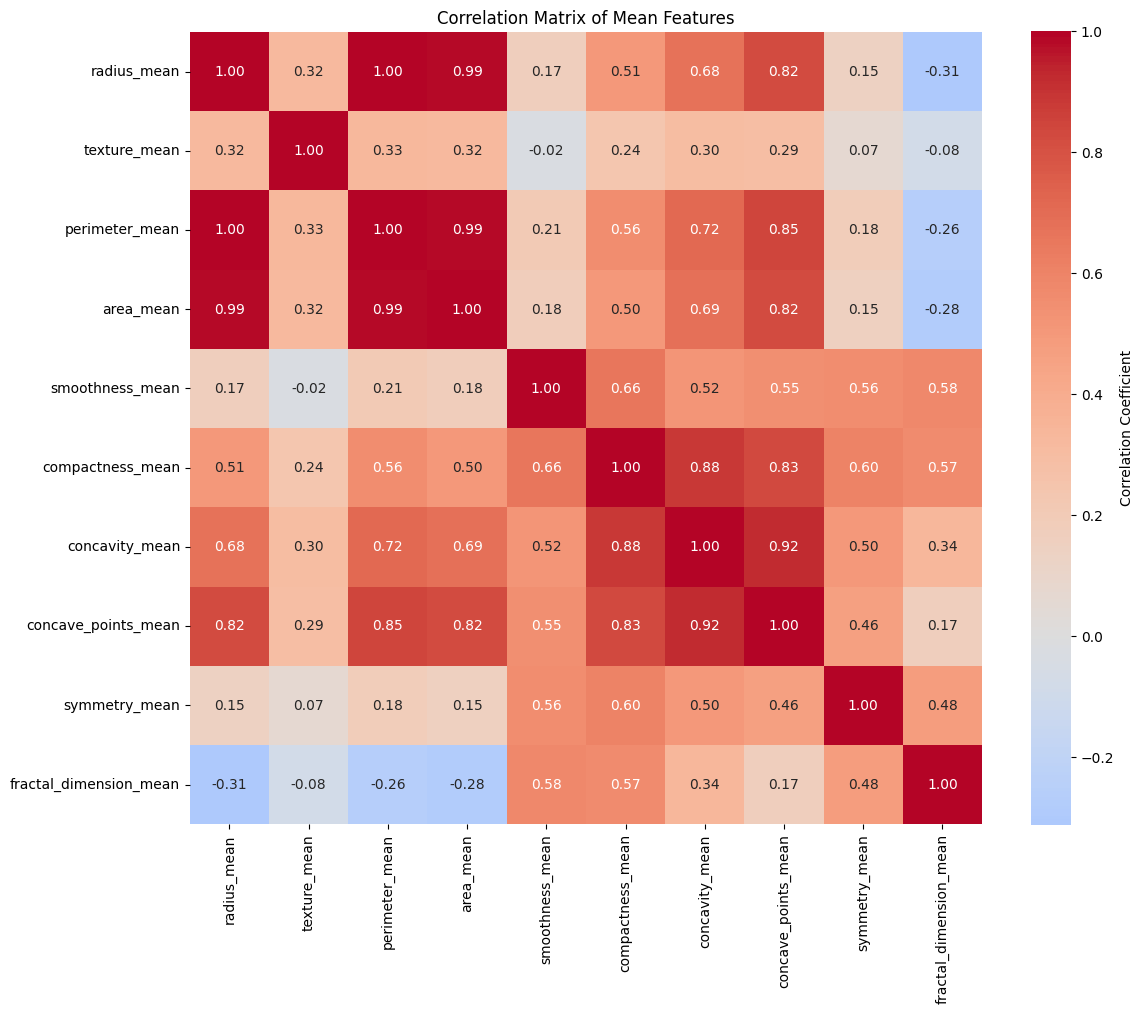

In [6]:
# Create correlation matrix for mean features only
mean_features = [col for col in df.columns if col.endswith('_mean')]
print("Mean features we're analyzing:")
print(mean_features)

correlation_matrix = df[mean_features].corr()

# Visualize correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Mean Features')
plt.tight_layout()
plt.show()

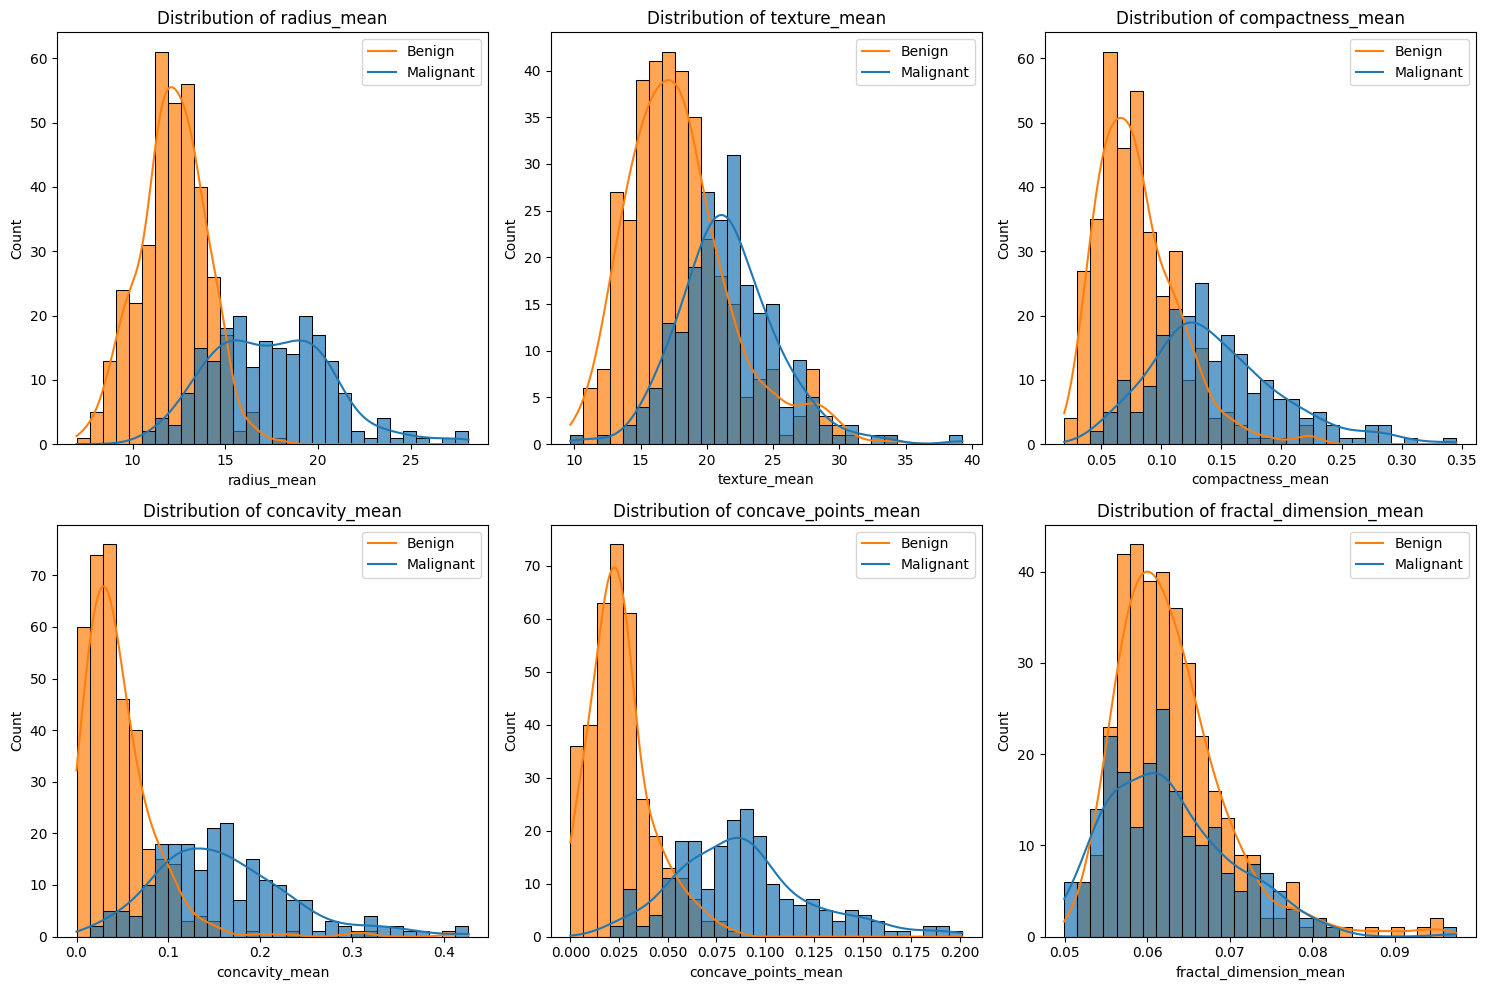

In [7]:
# Plot distributions of important mean features
important_features = ['radius_mean', 'texture_mean', 'compactness_mean',
                     'concavity_mean', 'concave_points_mean', 'fractal_dimension_mean']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(important_features):
    sns.histplot(data=df, x=feature, hue='diagnosis', bins=30,
                alpha=0.7, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].legend(['Benign', 'Malignant'])

plt.tight_layout()
plt.show()

In [8]:
from scipy import stats

# Separate data by diagnosis
benign_data = df[df['diagnosis'] == 'B']
malignant_data = df[df['diagnosis'] == 'M']

# Select key features for t-tests
key_features = ['radius_mean', 'texture_mean', 'compactness_mean',
               'concavity_mean', 'concave_points_mean', 'fractal_dimension_mean']

print("T-TEST RESULTS:")
print("="*60)
print(f"{'Feature':<25} {'T-statistic':<15} {'P-value':<15} {'Significant?'}")
print("-"*60)

t_test_results = []
for feature in key_features:
    benign_values = benign_data[feature]
    malignant_values = malignant_data[feature]

    t_stat, p_value = stats.ttest_ind(benign_values, malignant_values)
    significant = "YES" if p_value < 0.05 else "NO"

    print(f"{feature:<25} {t_stat:<15.4f} {p_value:<15.6f} {significant}")

    t_test_results.append({
        'feature': feature,
        't_statistic': t_stat,
        'p_value': p_value,
        'significant': significant
    })

T-TEST RESULTS:
Feature                   T-statistic     P-value         Significant?
------------------------------------------------------------
radius_mean               -25.4358        0.000000        YES
texture_mean              -10.8672        0.000000        YES
compactness_mean          -17.6984        0.000000        YES
concavity_mean            -23.1040        0.000000        YES
concave_points_mean       -29.3543        0.000000        YES
fractal_dimension_mean    0.3057          0.759937        NO


In [9]:
# Outlier detection using IQR method
def detect_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers, lower_bound, upper_bound

print("OUTLIER ANALYSIS:")
print("="*80)
print(f"{'Feature':<25} {'Total Outliers':<15} {'Benign Outliers':<15} {'Malignant Outliers'}")
print("-"*80)

for feature in key_features:
    outliers, lower, upper = detect_outliers_iqr(df, feature)

    benign_outliers = outliers[outliers['diagnosis'] == 'B']
    malignant_outliers = outliers[outliers['diagnosis'] == 'M']

    print(f"{feature:<25} {len(outliers):<15} {len(benign_outliers):<15} {len(malignant_outliers)}")

OUTLIER ANALYSIS:
Feature                   Total Outliers  Benign Outliers Malignant Outliers
--------------------------------------------------------------------------------
radius_mean               14              0               14
texture_mean              7               2               5
compactness_mean          16              0               16
concavity_mean            18              3               15
concave_points_mean       10              0               10
fractal_dimension_mean    15              10              5


In [10]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
import seaborn as sns


# Prepare features and target
selected_features = ['radius_mean', 'texture_mean', 'compactness_mean',
                    'concavity_mean', 'concave_points_mean']

X = df[selected_features]
y = df['diagnosis']

# Encode target variable: M=1 (Malignant), B=0 (Benign)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print("Feature Selection:")
print(f"Selected features: {selected_features}")
print(f"Target encoding: {dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))}")
print(f"Dataset shape: {X.shape}")
print(f"Target distribution: Benign={sum(y_encoded==0)}, Malignant={sum(y_encoded==1)}")

Feature Selection:
Selected features: ['radius_mean', 'texture_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean']
Target encoding: {'B': np.int64(0), 'M': np.int64(1)}
Dataset shape: (569, 5)
Target distribution: Benign=357, Malignant=212


In [11]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

print("Data Split Information:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Training target distribution: Benign={sum(y_train==0)}, Malignant={sum(y_train==1)}")
print(f"Test target distribution: Benign={sum(y_test==0)}, Malignant={sum(y_test==1)}")

Data Split Information:
Training set: 455 samples
Test set: 114 samples
Training target distribution: Benign=285, Malignant=170
Test target distribution: Benign=72, Malignant=42


In [12]:
# Scale features for algorithms that are sensitive to scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Show scaling effect
print("Feature Scaling Effect:")
print("Original feature ranges:")
for i, feature in enumerate(selected_features):
    print(f"{feature}: {X_train.iloc[:, i].min():.2f} to {X_train.iloc[:, i].max():.2f}")

print("\nScaled feature ranges:")
for i, feature in enumerate(selected_features):
    print(f"{feature}: {X_train_scaled[:, i].min():.2f} to {X_train_scaled[:, i].max():.2f}")

Feature Scaling Effect:
Original feature ranges:
radius_mean: 6.98 to 28.11
texture_mean: 9.71 to 39.28
compactness_mean: 0.02 to 0.35
concavity_mean: 0.00 to 0.43
concave_points_mean: 0.00 to 0.20

Scaled feature ranges:
radius_mean: -2.01 to 3.90
texture_mean: -2.27 to 4.63
compactness_mean: -1.57 to 4.49
concavity_mean: -1.09 to 4.14
concave_points_mean: -1.24 to 3.84


In [13]:
# Train Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred_log = log_reg.predict(X_test_scaled)
y_pred_proba_log = log_reg.predict_proba(X_test_scaled)[:, 1]

# Evaluate model
accuracy_log = accuracy_score(y_test, y_pred_log)
auc_log = roc_auc_score(y_test, y_pred_proba_log)

print("="*50)
print("LOGISTIC REGRESSION RESULTS")
print("="*50)
print(f"Accuracy: {accuracy_log:.4f}")
print(f"AUC Score: {auc_log:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log, target_names=['Benign', 'Malignant']))

LOGISTIC REGRESSION RESULTS
Accuracy: 0.9386
AUC Score: 0.9861

Classification Report:
              precision    recall  f1-score   support

      Benign       0.95      0.96      0.95        72
   Malignant       0.93      0.90      0.92        42

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [14]:
# Feature importance (coefficients)
feature_importance_log = pd.DataFrame({
    'feature': selected_features,
    'coefficient': log_reg.coef_[0],
    'abs_coefficient': np.abs(log_reg.coef_[0])
}).sort_values('abs_coefficient', ascending=False)

print("\nFeature Importance (Logistic Regression):")
print(feature_importance_log)


Feature Importance (Logistic Regression):
               feature  coefficient  abs_coefficient
4  concave_points_mean     2.986440         2.986440
0          radius_mean     1.978247         1.978247
1         texture_mean     1.230358         1.230358
3       concavity_mean     0.315467         0.315467
2     compactness_mean    -0.075961         0.075961


In [15]:
# Train Random Forest (doesn't need scaling)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

print("="*50)
print("RANDOM FOREST RESULTS")
print("="*50)
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"AUC Score: {auc_rf:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Benign', 'Malignant']))

RANDOM FOREST RESULTS
Accuracy: 0.9386
AUC Score: 0.9815

Classification Report:
              precision    recall  f1-score   support

      Benign       0.93      0.97      0.95        72
   Malignant       0.95      0.88      0.91        42

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [16]:
# Feature importance for Random Forest
feature_importance_rf = pd.DataFrame({
    'feature': selected_features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance (Random Forest):")
print(feature_importance_rf)


Feature Importance (Random Forest):
               feature  importance
4  concave_points_mean    0.391435
0          radius_mean    0.267177
3       concavity_mean    0.202294
1         texture_mean    0.076379
2     compactness_mean    0.062715


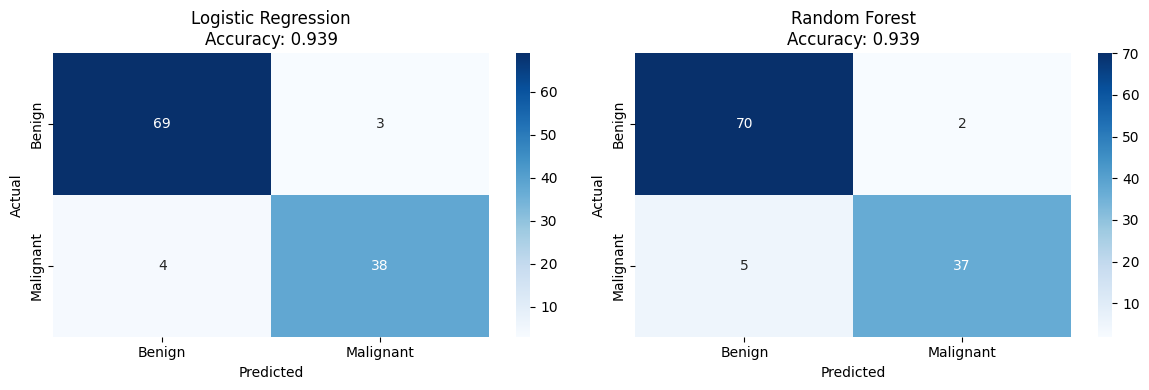

In [17]:
# Create confusion matrices for both models
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

models = [
    ('Logistic Regression', y_pred_log),
    ('Random Forest', y_pred_rf)
]

for i, (name, predictions) in enumerate(models):
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                xticklabels=['Benign', 'Malignant'],
                yticklabels=['Benign', 'Malignant'])
    axes[i].set_title(f'{name}\nAccuracy: {accuracy_score(y_test, predictions):.3f}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

MODEL PERFORMANCE SUMMARY
                 Model  Accuracy  AUC Score  Malignant Recall  False Negatives
0  Logistic Regression  0.938596   0.986111              0.90                4
1        Random Forest  0.938596   0.981481              0.88                5


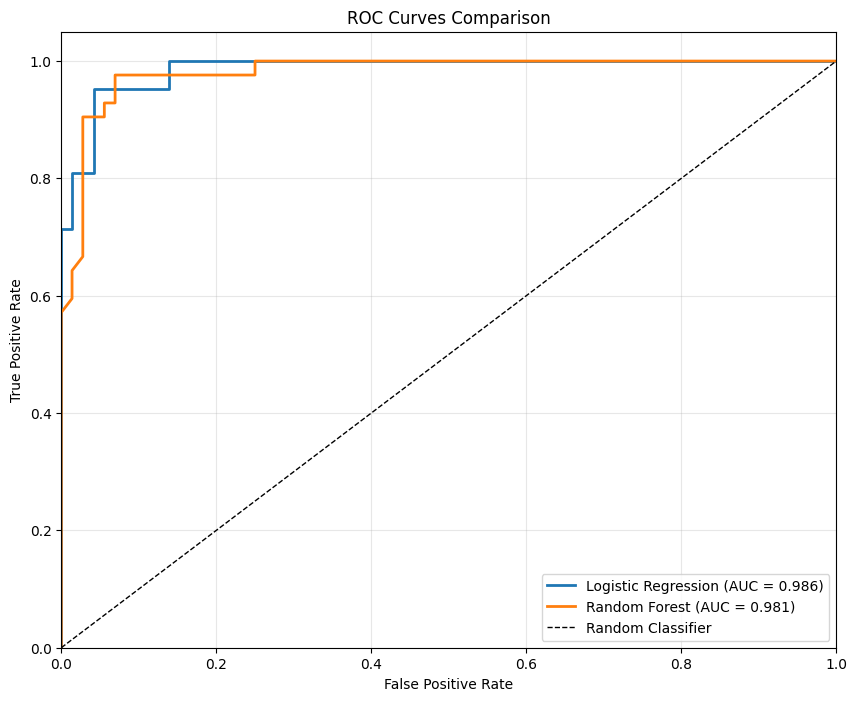

In [18]:
# Model Performance Summary
performance_summary = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [accuracy_log, accuracy_rf],
    'AUC Score': [auc_log, auc_rf],
    'Malignant Recall': [0.90, 0.88],  # From classification reports
    'False Negatives': [4, 5]
})

print("="*60)
print("MODEL PERFORMANCE SUMMARY")
print("="*60)
print(performance_summary)

# ROC Curves Comparison
plt.figure(figsize=(10, 8))

models_roc = [
    ('Logistic Regression', y_pred_proba_log, auc_log),
    ('Random Forest', y_pred_proba_rf, auc_rf)
]

for name, y_prob, auc_score in models_roc:
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, linewidth=2,
             label=f'{name} (AUC = {auc_score:.3f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()